In [1]:
import pylcp
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as const

In [3]:
gamma = 2*np.pi*6e6 # Hz
k = 2*np.pi/800e-9 # m^-1

t_unit = 1/gamma
#t_unit = 1e-1

m_unit = 1/k
#m_unit = 1e-9

velocity_unit = m_unit/t_unit
accel_unit = m_unit/t_unit**2
Hz_unit = 1/t_unit
Js_unit = const.hbar # kg m^2/s
mass_unit = Js_unit*t_unit/m_unit**2
HzperT_unit = const.value("Bohr magneton")/(Js_unit)
T_unit = Hz_unit/HzperT_unit
amu_unit = mass_unit/1.66e-27
cm_unit = m_unit/1e-2
F_unit = mass_unit*m_unit/t_unit**2
I_sat = (np.pi*const.h*const.c*gamma)/(3*227.5e-9**3) # W/m^2

In [6]:
ksim=k*m_unit
gammasim=gamma/Hz_unit

In [7]:
Hg, mu_qg = pylcp.hamiltonians.singleF(2, 1/6, 1)
He, mu_qe = pylcp.hamiltonians.singleF(2, 1  , 1)
dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(2,2)
ham = pylcp.hamiltonian(Hg, He, mu_qg, mu_qe, dijq, mass=100/amu_unit, k=ksim, gamma=gammasim)

In [43]:
mag_field = pylcp.fields.quadrupoleMagneticField(-5*1e-4*cm_unit*HzperT_unit/Hz_unit)

In [10]:
beams = pylcp.laserBeams([
        {'kvec':np.array([-1, 0, 0.])*ksim, 'pol':-1, 'delta':2*np.pi*(-3e6)/Hz_unit, 's':1},
        {'kvec':np.array([1, 0, 0.])*ksim, 'pol':-1, 'delta':2*np.pi*(-3e6)/Hz_unit, 's':1}], beam_type=pylcp.infinitePlaneWaveBeam)

Completed in 0.02 s.                                              


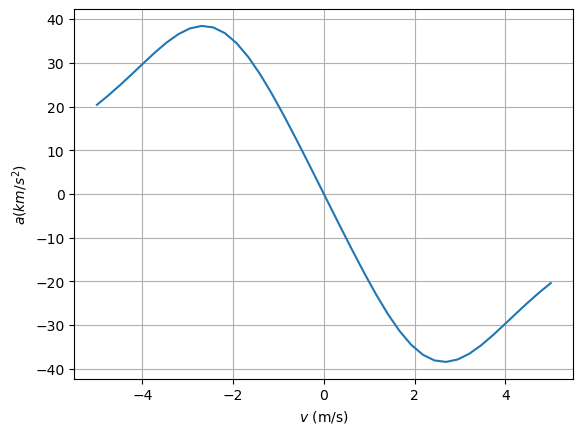

In [46]:
rateeq = pylcp.rateeq(beams, mag_field, ham,include_mag_forces=False)

v = np.linspace(-5/velocity_unit, 5/velocity_unit, 40)

rateeq.generate_force_profile([np.zeros(v.shape),np.zeros(v.shape),np.zeros(v.shape)],
                              [v,np.zeros(v.shape),np.zeros(v.shape)],
                           name='Frad', progress_bar=True)


fig, ax = plt.subplots(1, 1)

colormesh = ax.plot(v*velocity_unit, rateeq.profile['Frad'].F[0]*F_unit*1e-3/(46*1.66e-27))
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('$a(km/s^2)$')
ylim = ax.get_ylim()
ax.grid()
fig.subplots_adjust(left=0.12,right=0.9)

Completed in 0.05 s.                                              


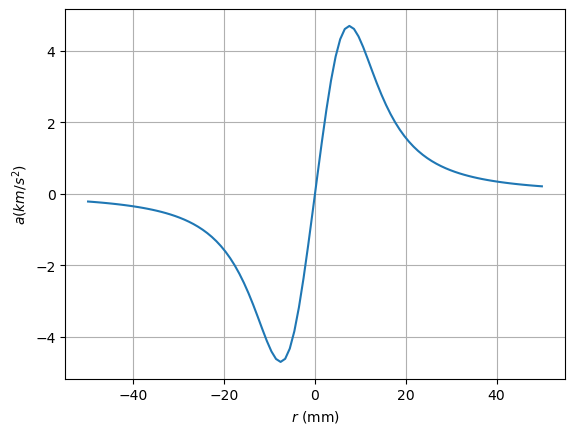

In [45]:
rateeq = pylcp.rateeq(beams, mag_field, ham,include_mag_forces=False)

r = np.linspace(-5/cm_unit, 5/cm_unit, 100)

rateeq.generate_force_profile([r,np.zeros(r.shape),np.zeros(r.shape)],
                              [np.zeros(r.shape),np.zeros(r.shape),np.zeros(r.shape)],
                           name='Frad', progress_bar=True)


fig, ax = plt.subplots(1, 1)

colormesh = ax.plot(r*cm_unit*10, rateeq.profile['Frad'].F[0]*F_unit*1e-3/(46*1.66e-27))
ax.set_xlabel('$r$ (mm)')
ax.set_ylabel('$a(km/s^2)$')
ylim = ax.get_ylim()
ax.grid()
fig.subplots_adjust(left=0.12,right=0.9)

In [47]:
obe_kwargs = dict(itermax=40, rel=0, abs=0, deltat_r=np.inf, deltat_tmax=1/gammasim,
                  Npts=5001, debug = False, reset_pos = True, rtol=1e-6)

In [50]:
obe = pylcp.obe(beams, mag_field, ham, include_mag_forces=False, transform_into_re_im=False)

v = np.linspace(-5/velocity_unit, 5/velocity_unit, 40)

ts = [0.5/gammasim, 1/gammasim, 100/gammasim, 500/gammasim]
Npts = [2001]
iters = [10,50,100]
resets = [True, False]

params = np.meshgrid(ts,Npts,iters,resets)

for i, paramset in enumerate(zip(*[p.flatten() for p in params])):
    
    obe_kwargs["deltat_tmax"]=paramset[0]
    obe_kwargs["Npts"]       =paramset[1]
    obe_kwargs["itermax"]    =paramset[2]
    obe_kwargs["reset_pos"]  =paramset[3]
    
    print(i+1,"/",len(ts)*len(Npts)*len(iters)*len(resets)," deltat=",paramset[0]*gammasim," Gamma, Npts=",paramset[1],", itermax=",paramset[2],", reset_pos=",paramset[3])
    
    obe.generate_force_profile([np.zeros(v.shape),np.zeros(v.shape),np.zeros(v.shape)],
                               [v                ,np.zeros(v.shape),np.zeros(v.shape)],
                               name=f'Frad{paramset}', progress_bar=True, **obe_kwargs)
    
    # fig, ax = plt.subplots(1, 1)

    # colormesh = ax.plot(v*velocity_unit, obe.profile[f'Frad{paramset}'].F[0]*F_unit*1e-3/(100*1.66e-27))
    # ax.set_xlabel('$v$ (m/s)')
    # ax.set_ylabel('$a(km/s^2)$')
    # ylim = ax.get_ylim()
    # ax.grid()
    # fig.subplots_adjust(left=0.12,right=0.9)

1 / 24  deltat= 0.5  Gamma, Npts= 2001 , itermax= 10 , reset_pos= True
Completed in 5.28 s.                                               
2 / 24  deltat= 0.5  Gamma, Npts= 2001 , itermax= 10 , reset_pos= False
Completed in 5.18 s.                                               
3 / 24  deltat= 0.5  Gamma, Npts= 2001 , itermax= 50 , reset_pos= True
Completed in 21.81 s.                                               
4 / 24  deltat= 0.5  Gamma, Npts= 2001 , itermax= 50 , reset_pos= False
Completed in 20.21 s.                                               
5 / 24  deltat= 0.5  Gamma, Npts= 2001 , itermax= 100 , reset_pos= True
Completed in 43.64 s.                                               
6 / 24  deltat= 0.5  Gamma, Npts= 2001 , itermax= 100 , reset_pos= False
Completed in 42.02 s.                                               
7 / 24  deltat= 1.0  Gamma, Npts= 2001 , itermax= 10 , reset_pos= True
Completed in 4.89 s.                                               
8 / 24  deltat= 1.

In [52]:
{j : i for i, j in list(enumerate(ts))}

{0.5: 0, 1.0: 1, 100.0: 2, 500.0: 3}

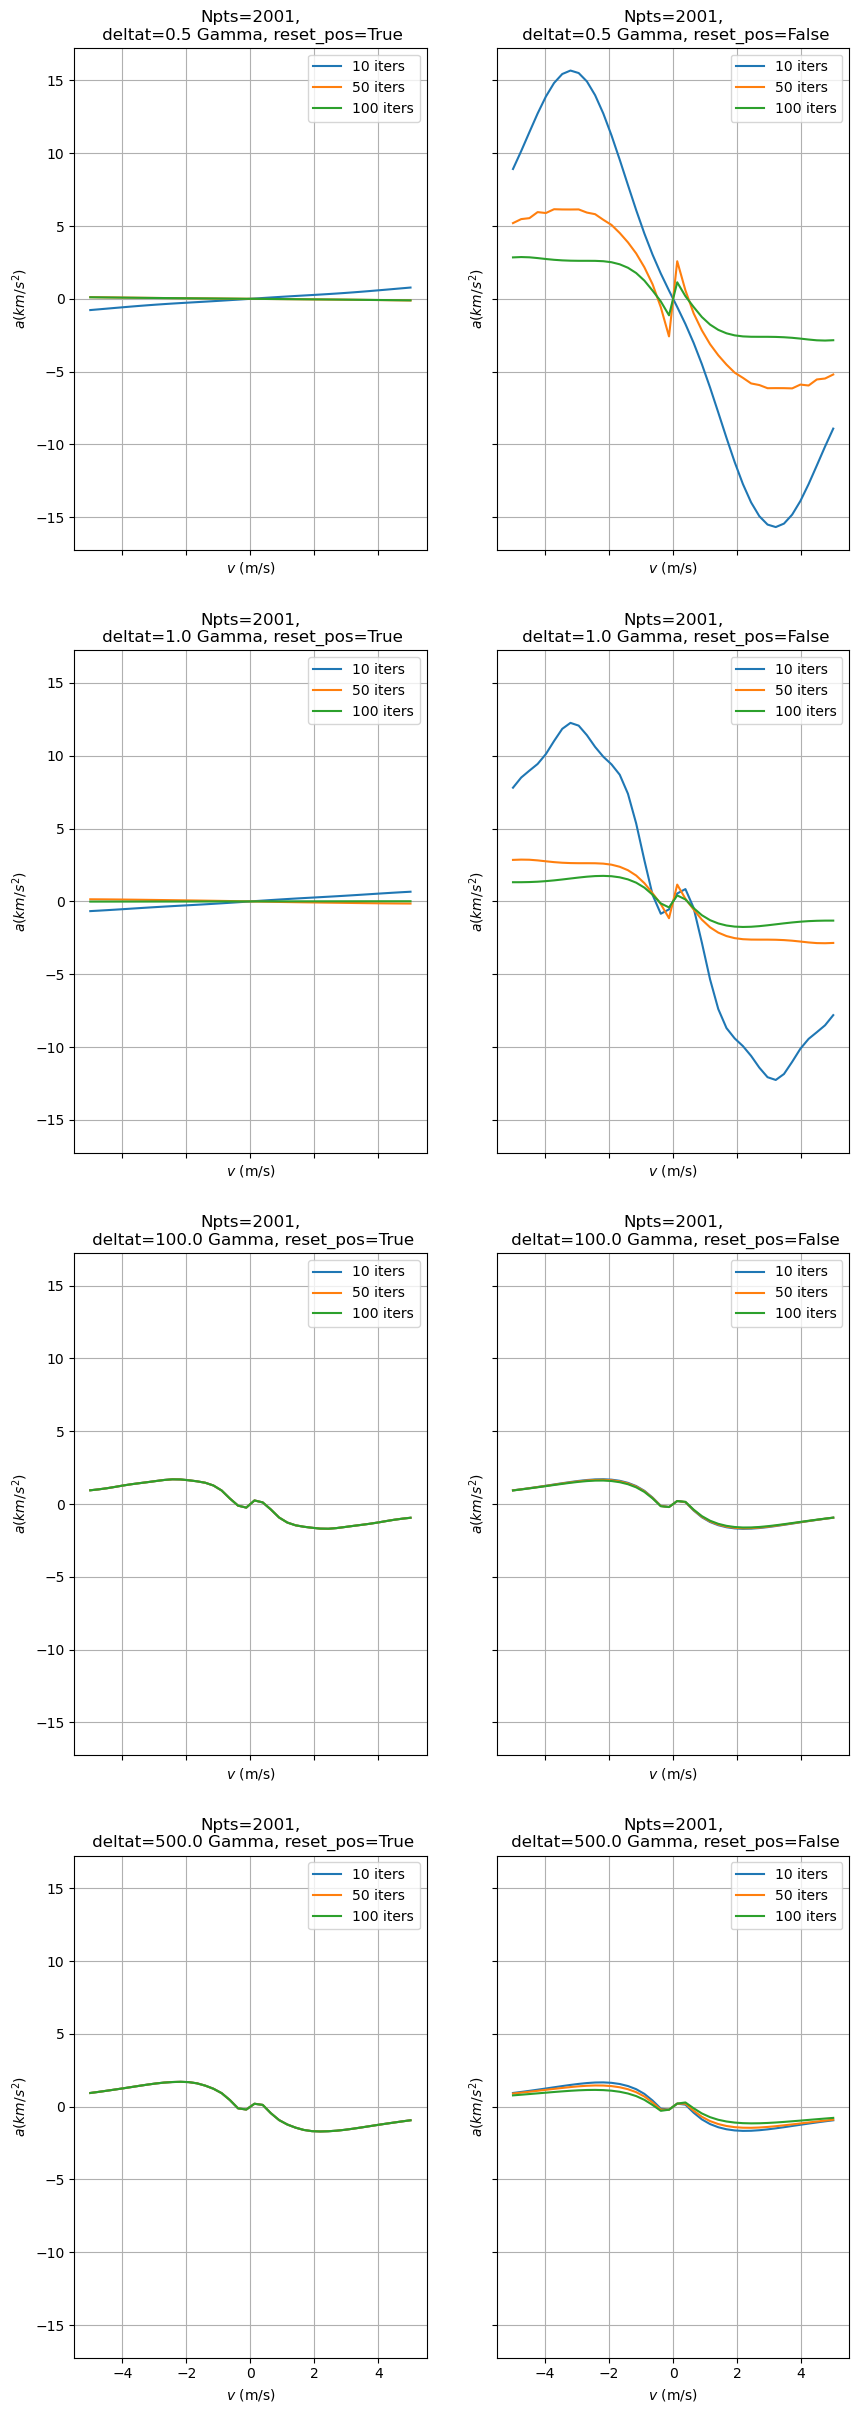

In [63]:
fig, axs = plt.subplots(4,2, figsize=[10,30], sharex=True, sharey=True)

axsa, axsb = axs.T

for paramset in zip(*[p.flatten() for p in params]):
    
    if paramset[3]:
        ax = axsa[{j : i for i, j in list(enumerate(ts))}[paramset[0]]]
    else:
        ax = axsb[{j : i for i, j in list(enumerate(ts))}[paramset[0]]]
        
    ax.plot(v*velocity_unit, obe.profile[f'Frad{paramset}'].F[0]*F_unit*1e-3/(100*1.66e-27), label = f"{paramset[2]} iters")
    ax.set_xlabel('$v$ (m/s)')
    ax.set_ylabel('$a(km/s^2)$')
    ax.grid()
    ax.set_title(f"Npts={paramset[1]},\n deltat={paramset[0]} Gamma, reset_pos={paramset[3]}")

for ax in axs.flatten():
    ax.legend()